In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('/content/emails.csv')

In [3]:
data.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [4]:
data['spam'].value_counts()

,count
spam,
0,4360
1,1368


In [7]:
#covert text to lower
def text_lower(input):
  return input.lower()
data['text']=data['text'].apply(text_lower)

In [8]:
def rem_special_character(input):
    clean_words = ""
    for spc in input:
        if spc.isalnum():
            clean_words += spc
    return clean_words

data['text'] = data['text'].apply(rem_special_character)

In [9]:
#remove html tag
import re
def rem_html_tag(input):
  clean_words=re.sub('<.*?>','',input)
  return clean_words
data['text'] = data['text'].apply(rem_html_tag)

In [10]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [11]:
stop_words=stopwords.words('english')

In [12]:
#remove stop words
def rem_sw(input):
  clean_words = []
  stopword_list=stopwords.words('english')
  words=input.split()
  for word in words:
    if word not in stopword_list:
      clean_words.append(word)
  clean_words = ' '.join(clean_words)
  return clean_words

data['text'] = data['text'].apply(rem_sw)

In [13]:
# use smote oversampling technique to handle imbalanced data
from imblearn.over_sampling import SMOTE

In [14]:
x=data.drop(columns=['spam'])
y=data['spam']

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
td=TfidfVectorizer()
x=td.fit_transform(x['text'])

In [17]:
smote=SMOTE()
x_smote,y_smote=smote.fit_resample(x,y)

In [18]:
y_smote.value_counts()

,count
spam,
1,4360
0,4360


In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_smote,y_smote,test_size=0.3)

In [28]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [29]:
model_nb=MultinomialNB()
model_lg=LogisticRegression()
model_rfc=RandomForestClassifier()
model_svc=SVC()
model_dtc=DecisionTreeClassifier()

In [32]:
model_nb.fit(x_train,y_train)

MultinomialNB()

In [33]:
model_lg.fit(x_train,y_train)

LogisticRegression()

In [34]:
model_rfc.fit(x_train,y_train)

RandomForestClassifier()

In [35]:
model_svc.fit(x_train,y_train)

SVC()

In [36]:
model_dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [37]:
emails = [
    'Hey brother how are you doing today? I hope that you are aware we have cricket match today',
    'You have got a prize of 500 $ call our customer service to avail the reward',
    'Where were you from the previous day. We have to celebrate our success'
]
model_nb.predict(td.transform(emails))

array([0, 0, 0])

In [38]:
model_lg.predict(td.transform(emails))

array([0, 0, 0])

In [39]:
model_rfc.predict(td.transform(emails))

array([0, 0, 0])

In [40]:
model_svc.predict(td.transform(emails))

array([1, 1, 1])

In [41]:
model_dtc.predict(td.transform(emails))

array([0, 0, 0])

In [42]:
from sklearn.metrics import confusion_matrix,classification_report

In [47]:
print(f"Confusion Matrx of {model_nb} \n" ,confusion_matrix(y_test,model_nb.predict(x_test)))
print(f"Confusion Matrx of {model_rfc} \n" ,confusion_matrix(y_test,model_rfc.predict(x_test)))
print(f"Confusion Matrx of {model_lg} \n" ,confusion_matrix(y_test,model_lg.predict(x_test)))
print(f"Confusion Matrx of {model_svc} \n" ,confusion_matrix(y_test,model_svc.predict(x_test)))
print(f"Confusion Matrx of {model_dtc} \n" ,confusion_matrix(y_test,model_dtc.predict(x_test)))

Confusion Matrx of MultinomialNB() 
 [[1289    0]
 [  94 1233]]
Confusion Matrx of RandomForestClassifier() 
 [[1289    0]
 [ 400  927]]
Confusion Matrx of LogisticRegression() 
 [[1289    0]
 [ 444  883]]
Confusion Matrx of SVC() 
 [[1289    0]
 [ 348  979]]
Confusion Matrx of DecisionTreeClassifier() 
 [[1289    0]
 [ 399  928]]


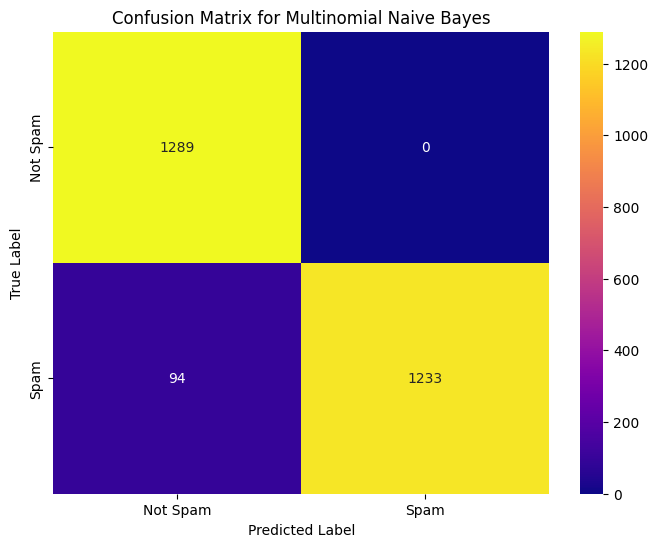

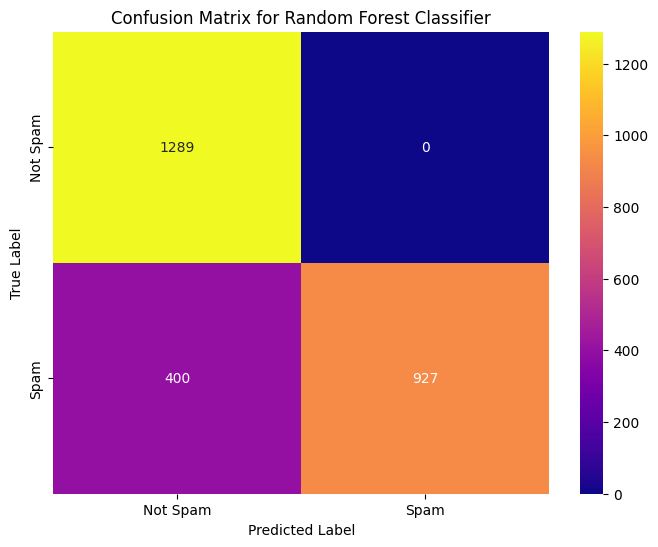

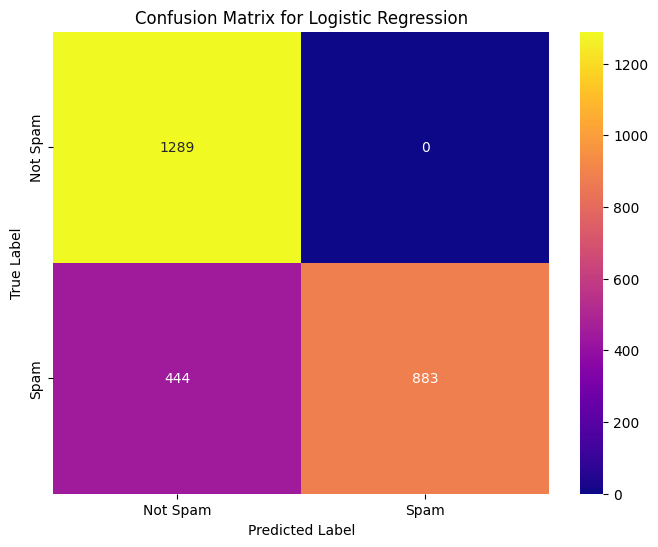

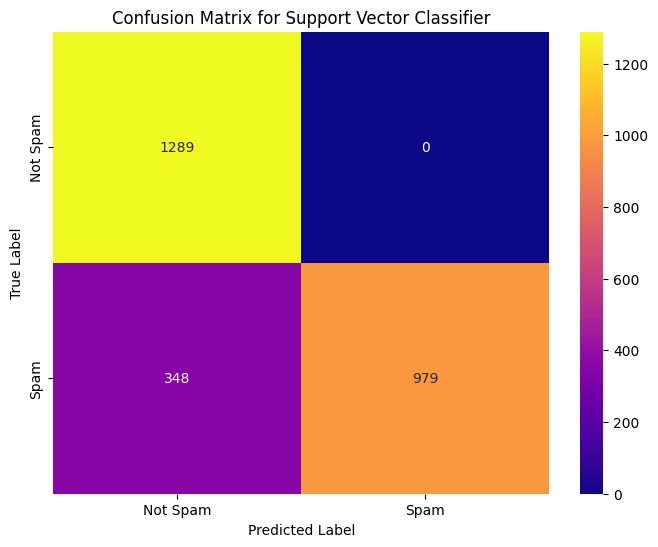

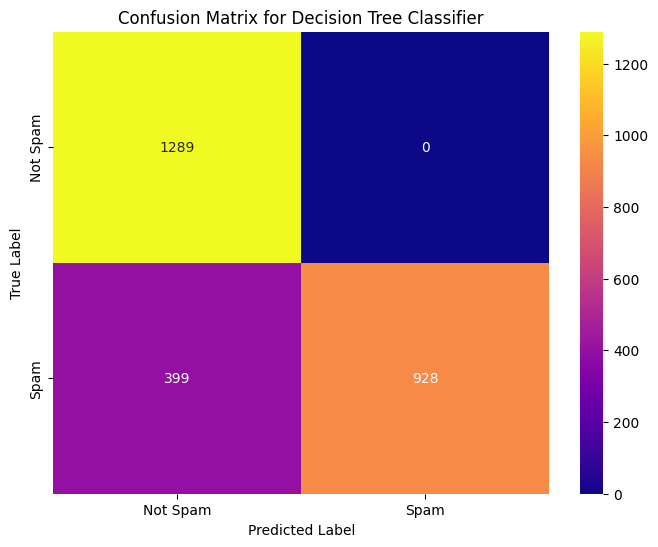

In [49]:
def plot_confusion_matrix(y_true, y_pred, model_name):
  cm = confusion_matrix(y_true, y_pred)
  plt.figure(figsize=(8, 6))
  sns.heatmap(cm, annot=True, fmt="d", cmap="plasma",
              xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
  plt.title(f'Confusion Matrix for {model_name}')
  plt.xlabel('Predicted Label')
  plt.ylabel('True Label')
  plt.show()

plot_confusion_matrix(y_test, model_nb.predict(x_test), "Multinomial Naive Bayes")
plot_confusion_matrix(y_test, model_rfc.predict(x_test), "Random Forest Classifier")
plot_confusion_matrix(y_test, model_lg.predict(x_test), "Logistic Regression")
plot_confusion_matrix(y_test, model_svc.predict(x_test), "Support Vector Classifier")
plot_confusion_matrix(y_test, model_dtc.predict(x_test), "Decision Tree Classifier")

In [50]:
print(f"Classification Report of {model_nb} \n" ,classification_report(y_test,model_nb.predict(x_test)))
print(f"Classification Report of {model_rfc} \n" ,classification_report(y_test,model_rfc.predict(x_test)))
print(f"Classification Report of {model_lg} \n" ,classification_report(y_test,model_lg.predict(x_test)))
print(f"Classification Report of {model_svc} \n" ,classification_report(y_test,model_svc.predict(x_test)))
print(f"Classification Report of {model_dtc} \n" ,classification_report(y_test,model_dtc.predict(x_test)))

Classification Report of MultinomialNB() 
               precision    recall  f1-score   support

           0       0.93      1.00      0.96      1289
           1       1.00      0.93      0.96      1327

    accuracy                           0.96      2616
   macro avg       0.97      0.96      0.96      2616
weighted avg       0.97      0.96      0.96      2616

Classification Report of RandomForestClassifier() 
               precision    recall  f1-score   support

           0       0.76      1.00      0.87      1289
           1       1.00      0.70      0.82      1327

    accuracy                           0.85      2616
   macro avg       0.88      0.85      0.84      2616
weighted avg       0.88      0.85      0.84      2616

Classification Report of LogisticRegression() 
               precision    recall  f1-score   support

           0       0.74      1.00      0.85      1289
           1       1.00      0.67      0.80      1327

    accuracy                           

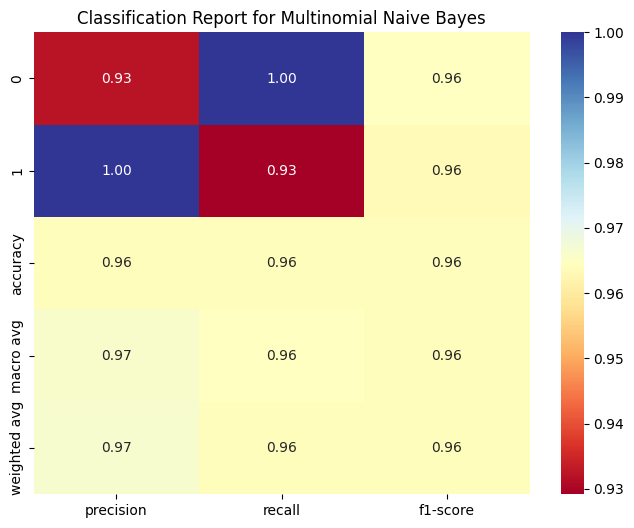

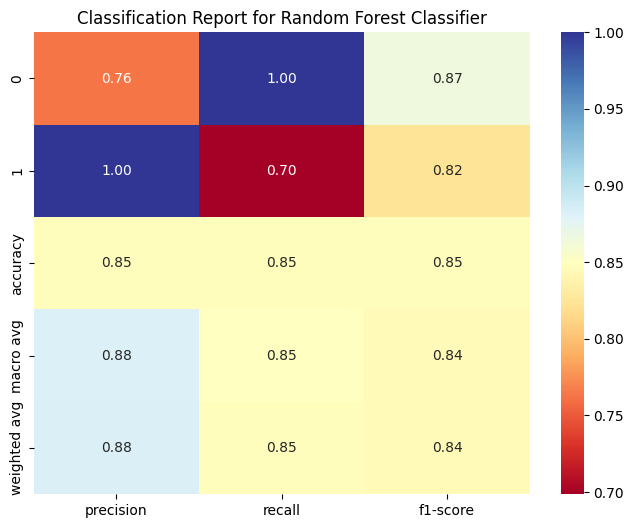

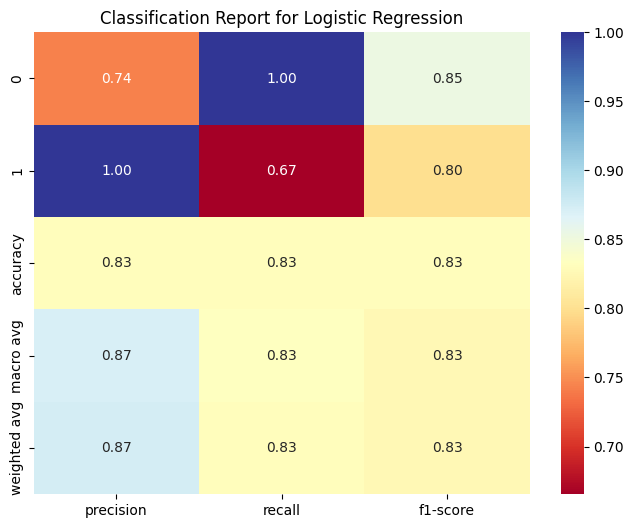

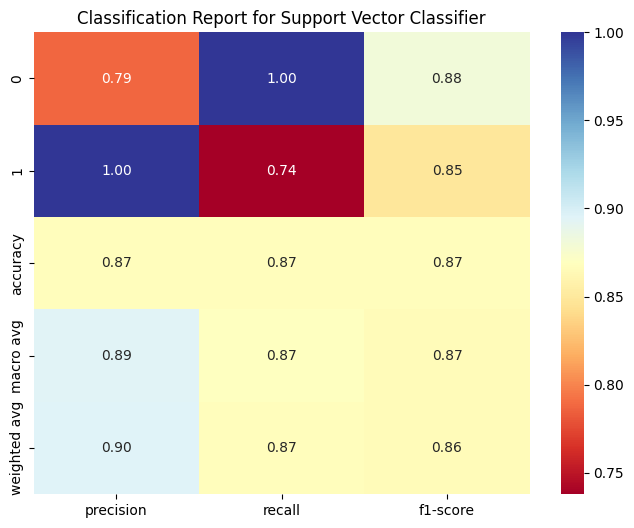

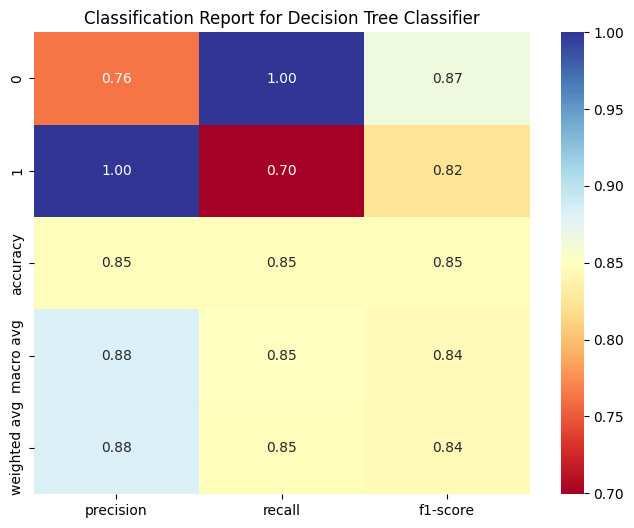

In [51]:
def plot_classification_report(y_true, y_pred, model_name):
    report = classification_report(y_true, y_pred, output_dict=True)
    df_classification_report = pd.DataFrame(report).transpose()
    plt.figure(figsize=(8, 6))
    sns.heatmap(df_classification_report[['precision', 'recall', 'f1-score']], annot=True, fmt=".2f", cmap="RdYlBu")
    plt.title(f'Classification Report for {model_name}')
    plt.show()


plot_classification_report(y_test, model_nb.predict(x_test), "Multinomial Naive Bayes")
plot_classification_report(y_test, model_rfc.predict(x_test), "Random Forest Classifier")
plot_classification_report(y_test, model_lg.predict(x_test), "Logistic Regression")
plot_classification_report(y_test, model_svc.predict(x_test), "Support Vector Classifier")
plot_classification_report(y_test, model_dtc.predict(x_test), "Decision Tree Classifier")

In [52]:
print(f"Score of model {model_nb} \n",model_nb.score(x_test,y_test))
print(f"Score of model {model_rfc} \n",model_rfc.score(x_test,y_test))
print(f"Score of model {model_lg} \n",model_lg.score(x_test,y_test))
print(f"Score of model {model_svc} \n",model_svc.score(x_test,y_test))
print(f"Score of model {model_dtc} \n",model_dtc.score(x_test,y_test))

Score of model MultinomialNB() 
 0.9640672782874617
Score of model RandomForestClassifier() 
 0.8470948012232415
Score of model LogisticRegression() 
 0.8302752293577982
Score of model SVC() 
 0.8669724770642202
Score of model DecisionTreeClassifier() 
 0.8474770642201835


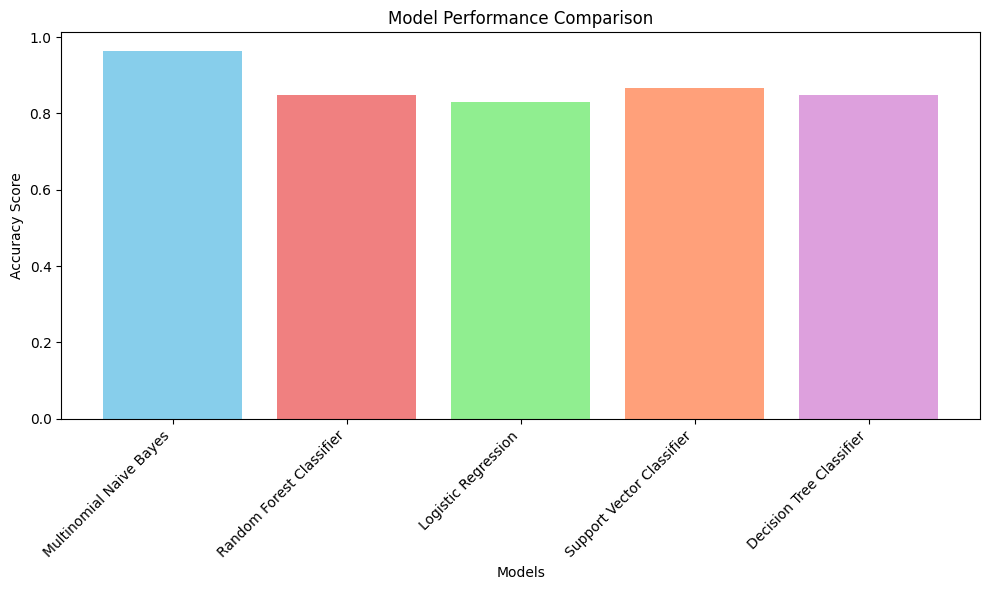

In [53]:
model_scores = {
    'Multinomial Naive Bayes': model_nb.score(x_test, y_test),
    'Random Forest Classifier': model_rfc.score(x_test, y_test),
    'Logistic Regression': model_lg.score(x_test, y_test),
    'Support Vector Classifier': model_svc.score(x_test, y_test),
    'Decision Tree Classifier': model_dtc.score(x_test, y_test)
}

models = list(model_scores.keys())
scores = list(model_scores.values())

plt.figure(figsize=(10, 6))
plt.bar(models, scores, color=['skyblue', 'lightcoral', 'lightgreen', 'lightsalmon', 'plum'])
plt.xlabel("Models")
plt.ylabel("Accuracy Score")
plt.title("Model Performance Comparison")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [55]:
from sklearn.model_selection import KFold, cross_val_score

n_splits = 5

kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)


models = {
    'Multinomial Naive Bayes': model_nb,
    'Random Forest Classifier': model_rfc,
    'Logistic Regression': model_lg,
    'Support Vector Classifier': model_svc,
    'Decision Tree Classifier': model_dtc
}


for model_name, model in models.items():
    cv_scores = cross_val_score(model, x_smote, y_smote, cv=kf)
    print(f"KFold Cross-Validation Scores for {model_name}: {cv_scores}")

KFold Cross-Validation Scores for Multinomial Naive Bayes: [0.9684633  0.53325688 0.53555046 0.96961009 0.52522936]
KFold Cross-Validation Scores for Random Forest Classifier: [0.84002294 0.8331422  0.86066514 0.84002294 0.84862385]
KFold Cross-Validation Scores for Logistic Regression: [0.82110092 0.82052752 0.84461009 0.82626147 0.84002294]
KFold Cross-Validation Scores for Support Vector Classifier: [0.86754587 0.86295872 0.89105505 0.86754587 0.88073394]
KFold Cross-Validation Scores for Decision Tree Classifier: [0.84002294 0.8331422  0.86066514 0.84002294 0.84862385]


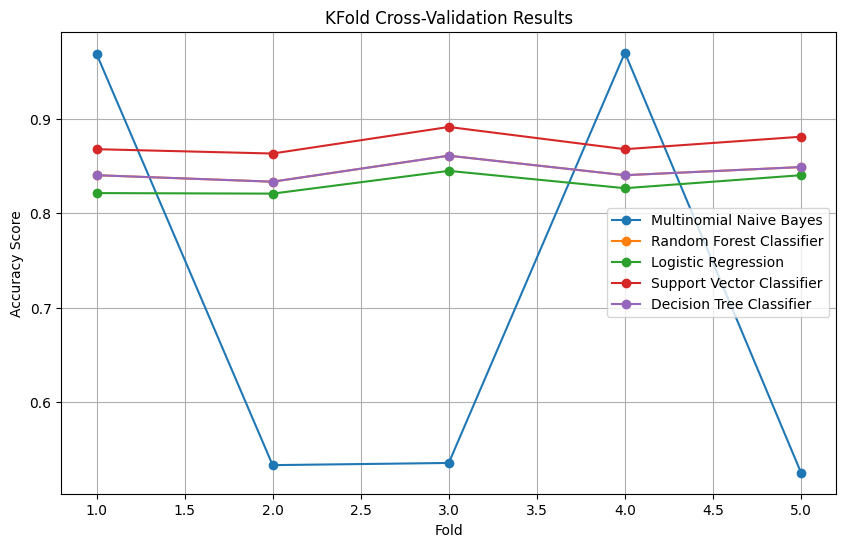

In [56]:
def plot_kfold_results(models, x_smote, y_smote, kf):
    plt.figure(figsize=(10, 6))
    for model_name, model in models.items():
        cv_scores = cross_val_score(model, x_smote, y_smote, cv=kf)
        plt.plot(range(1, len(cv_scores) + 1), cv_scores, marker='o', label=model_name)
    plt.xlabel("Fold")
    plt.ylabel("Accuracy Score")
    plt.title("KFold Cross-Validation Results")
    plt.legend()
    plt.grid(True)
    plt.show()

plot_kfold_results(models, x_smote, y_smote, kf)

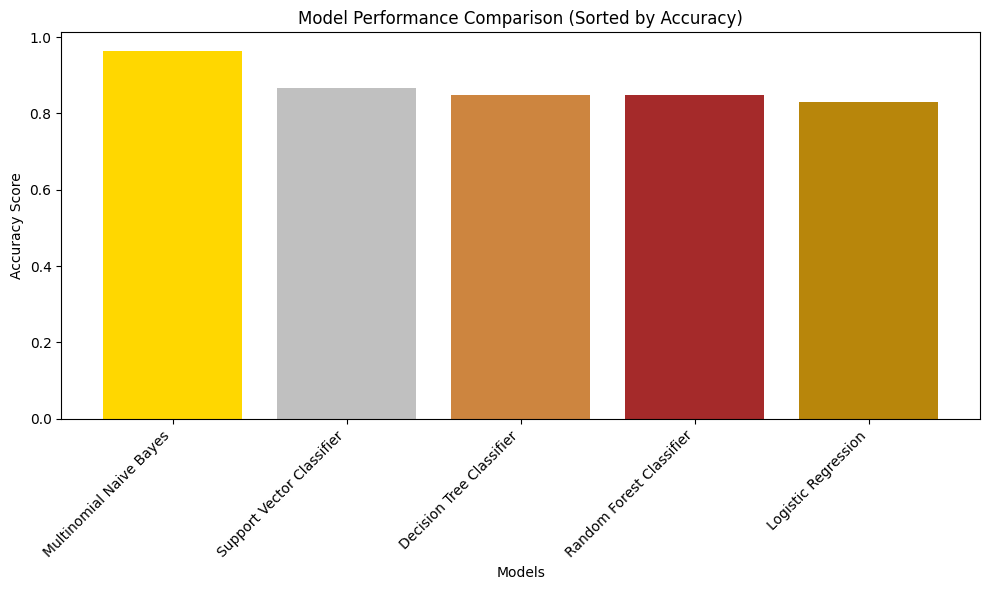

In [57]:
model_scores_sorted = dict(sorted(model_scores.items(), key=lambda item: item[1], reverse=True))

models = list(model_scores_sorted.keys())
scores = list(model_scores_sorted.values())

plt.figure(figsize=(10, 6))
plt.bar(models, scores, color=['gold', 'silver', 'peru', 'brown', 'darkgoldenrod'])  # Colors representing ranking
plt.xlabel("Models")
plt.ylabel("Accuracy Score")
plt.title("Model Performance Comparison (Sorted by Accuracy)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()